Posterior pentru Y=0, θ=0.2
Posterior pentru Y=0, θ=0.5
Posterior pentru Y=5, θ=0.2
Posterior pentru Y=5, θ=0.5
Posterior pentru Y=10, θ=0.2
Posterior pentru Y=10, θ=0.5


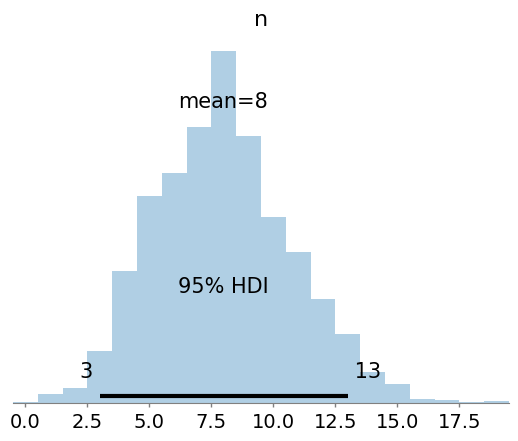

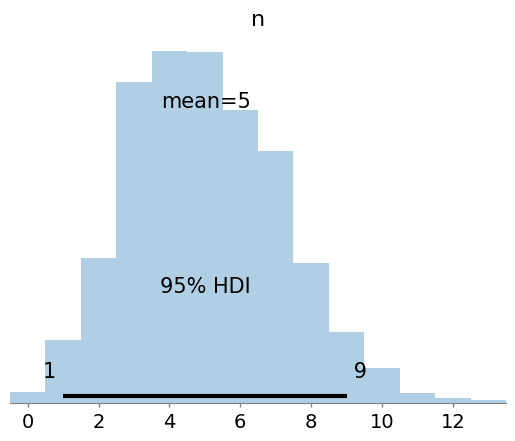

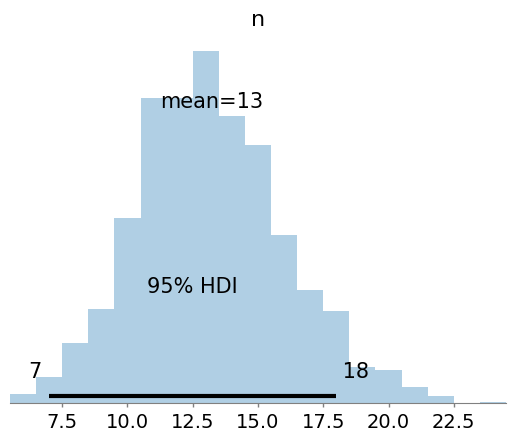

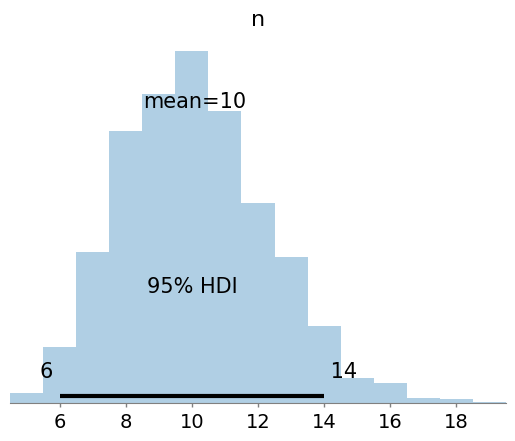

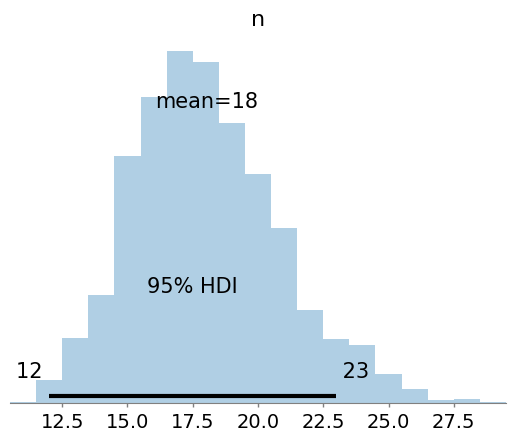

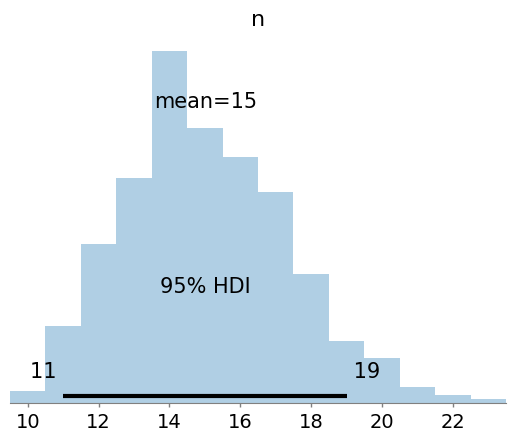

In [2]:
import pymc as pm
import arviz as az

Y_values = [0, 5, 10]  # Valorile posibile pentru Y
theta_values = [0.2, 0.5]  # Valorile posibile pentru theta
lambda_n = 10

import pytensor
pytensor.config.exception_verbosity = "high"

for Y in Y_values:
    for theta in theta_values:
        with pm.Model() as model:
            n = pm.Poisson("n", mu=lambda_n)
            Y_obs = pm.Binomial("Y_obs", n=n, p=theta, observed=Y)

            trace = pm.sample(2000, return_inferencedata=True, progressbar=False)

            az.plot_posterior(trace, var_names=["n"], hdi_prob=0.95)
            #az.labels(["n"])
            print(f"Posterior pentru Y={Y}, θ={theta}")
